In [1]:
# Import libs
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Загрузка данных

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

## Метки классов

|Метка|Класс|
|:-----:|:-----|
|0|T-shirt (Футболка)|
|1|Trouser (Брюки)|
|2|Pullover (Свитер)|
|3|Dress (Платье)|
|4|Coat (Пальто)|
|5|Sandal (Сандали)|
|6|Shirt (Рубашка)|
|7|Sneaker (Кроссовки)|
|8|Bag (Сумка)|
|9|Ankle boot (Ботильоны)|

## Подготовка данных

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_imgs.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_imgs.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

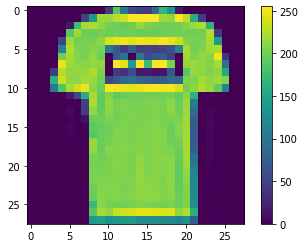

In [11]:
plt.imshow(train_imgs[1])
plt.colorbar()
plt.show()

In [12]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

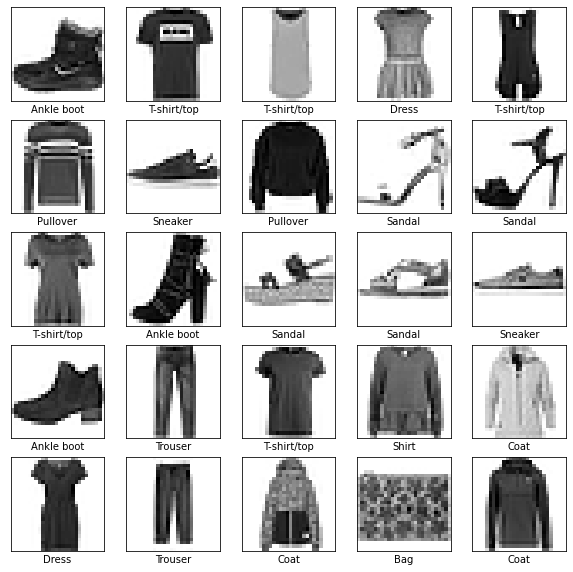

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

Прежде чем модель будет готова к обучению, ей потребуется еще несколько настроек. Они добавляются во время этапа компиляции модели:

* Loss function (функция потери) — измеряет насколько точная модель во время обучения
* Optimizer (оптимизатор) — это то, как модель обновляется на основе данных, которые она видит, и функции потери
* Metrics (метрики) — используется для контроля за этапами обучения и тестирования

In [15]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [17]:
history = model.fit(train_imgs.reshape(60000, 28, 28, 1),
                    train_labels,
                    epochs=20, validation_split=0.18, batch_size=256)

Epoch 1/20
193/193 [==============================] - 30s 152ms/step - loss: 1.2247 - accuracy: 0.5496 - val_loss: 0.5297 - val_accuracy: 0.8044
Epoch 2/20
193/193 [==============================] - 30s 156ms/step - loss: 0.5608 - accuracy: 0.7880 - val_loss: 0.4323 - val_accuracy: 0.8369
Epoch 3/20
193/193 [==============================] - 30s 154ms/step - loss: 0.4731 - accuracy: 0.8240 - val_loss: 0.3801 - val_accuracy: 0.8613
Epoch 4/20
193/193 [==============================] - 31s 160ms/step - loss: 0.4191 - accuracy: 0.8465 - val_loss: 0.3475 - val_accuracy: 0.8740
Epoch 5/20
193/193 [==============================] - 30s 156ms/step - loss: 0.3923 - accuracy: 0.8560 - val_loss: 0.3301 - val_accuracy: 0.8770
Epoch 6/20
193/193 [==============================] - 30s 153ms/step - loss: 0.3603 - accuracy: 0.8674 - val_loss: 0.3075 - val_accuracy: 0.8844
Epoch 7/20
193/193 [==============================] - 30s 154ms/step - loss: 0.3458 - accuracy: 0.8720 - val_loss: 0.2885 - val_ac

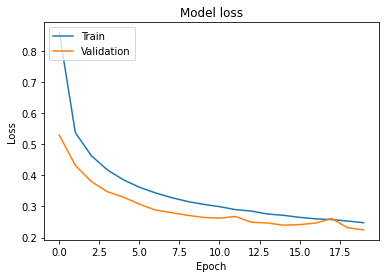

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Оценка точности

In [19]:
test_loss, test_acc = model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.2370 - accuracy: 0.9108
Test accuracy: 0.9107999801635742


In [21]:
predictions = model.predict(test_imgs.reshape(10000, 28, 28, 1))

In [22]:
predictions[0]

array([7.9824334e-09, 2.1966057e-11, 3.2275191e-10, 1.2728253e-09,
       9.0811551e-12, 1.2444319e-05, 1.1151503e-09, 2.0087445e-04,
       6.9241396e-10, 9.9978667e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(prediction_array, true_label, image):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap='binary')
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         class_names[true_label]
                                        ),
               color=color)


def plot_value_array(prediction_array, true_label):
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(prediction_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

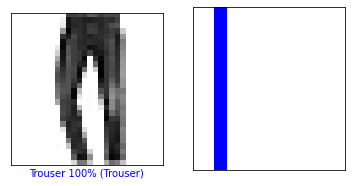

In [26]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_imgs[i])
plt.subplot(1,2,2)
plot_value_array(predictions[i],  test_labels[i])
plt.show()

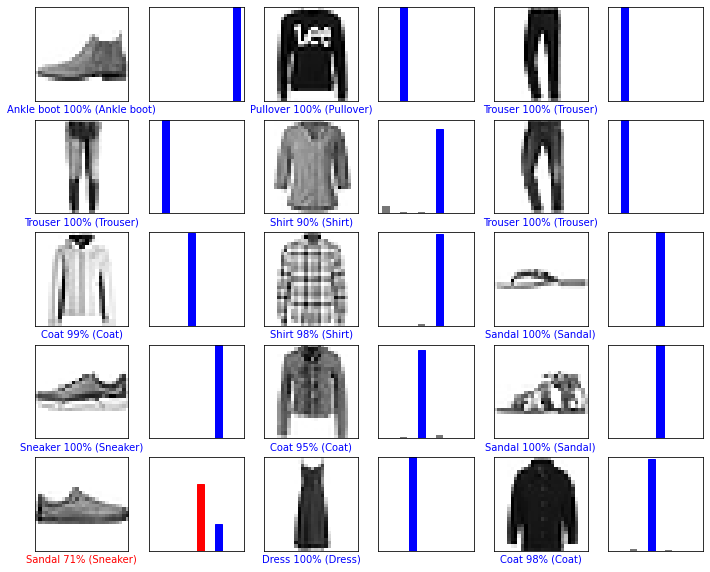

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_imgs[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.show()

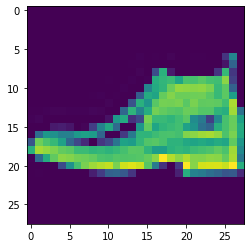

In [28]:
img = test_imgs[4567]
plt.imshow(img)
plt.show()

Модели tf.keras оптимизированы для того, чтобы делать прогнозы на пакеты (batch) или коллекции (collection). Поэтому, хотя мы используем одно изображение, нам нужно добавить его в список:

In [29]:
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [32]:
single_prediction = model.predict(img.reshape(1, 28, 28, 1))
single_prediction

array([[2.8227085e-10, 9.7873261e-13, 8.8130562e-12, 2.9970519e-11,
        1.6736798e-13, 1.0037815e-05, 4.9981099e-11, 7.6787082e-06,
        2.0757278e-11, 9.9998224e-01]], dtype=float32)

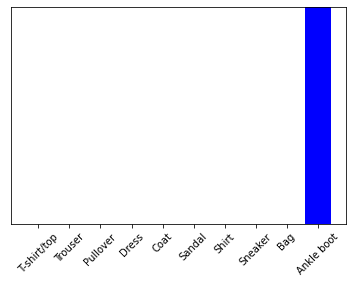

In [33]:
plot_value_array(single_prediction.flatten(), test_labels[4567])
plt.xticks(range(10), class_names, rotation=45)
plt.show()